## Internet Customer Analytics - Team Project
##### Team: Francisco Valle, Pranay Singla, Pedro Pablo Arrese

In [1]:
import numpy as np
import pandas as pd
from app_store_scraper import AppStore # We will use this library to scrape the reviews for each app. 
import time

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import random

### Text Retrieval and Mining

In [37]:
# Selecting the 5 streaming apps we will analyze
# Sometimes the following code takes more time than usual to fetch all the reviews. Please, re run if it takes too long. Thank you.

In [3]:
peacock = AppStore(country='us', app_name='peacock', app_id=1508186374)

2020-10-28 22:21:15,530 [INFO] Base - Initialised: AppStore('us', 'peacock', 1508186374)
2020-10-28 22:21:15,537 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/peacock/id1508186374


In [4]:
# Peacock
while len(peacock.reviews) < 1000:
    peacock.review(how_many=100)
#     time.sleep(5)

2020-10-28 22:21:23,252 [INFO] Base - [id:1508186374] Fetched 40 reviews (40 fetched in total)
2020-10-28 22:21:23,736 [INFO] Base - [id:1508186374] Fetched 100 reviews (100 fetched in total)
2020-10-28 22:21:30,232 [INFO] Base - [id:1508186374] Fetched 20 reviews (120 fetched in total)
2020-10-28 22:21:37,197 [INFO] Base - [id:1508186374] Fetched 80 reviews (180 fetched in total)
2020-10-28 22:21:37,374 [INFO] Base - [id:1508186374] Fetched 100 reviews (200 fetched in total)
2020-10-28 22:21:44,240 [INFO] Base - [id:1508186374] Fetched 60 reviews (260 fetched in total)
2020-10-28 22:21:44,644 [INFO] Base - [id:1508186374] Fetched 100 reviews (300 fetched in total)
2020-10-28 22:21:51,224 [INFO] Base - [id:1508186374] Fetched 20 reviews (320 fetched in total)
2020-10-28 22:21:57,996 [INFO] Base - [id:1508186374] Fetched 80 reviews (380 fetched in total)
2020-10-28 22:21:58,113 [INFO] Base - [id:1508186374] Fetched 100 reviews (400 fetched in total)
2020-10-28 22:21:58,770 [INFO] Base -

In [5]:
peacock_df = pd.DataFrame(peacock.reviews)

In [6]:
del peacock_df['developerResponse']
peacock_df.drop_duplicates(subset='review', inplace = True)
peacock_df = peacock_df.iloc[:1000,:]

In [7]:
peacock_df = peacock_df[['userName','review','rating']]

In [8]:
peacock_df.head()

,userName,review,rating
0,8432789,"I am a day 1 user, waited months for this app ...",3
1,Hän C.,"First off, I do love the peacock service - I a...",3
2,kevintstephens,"The streaming service itself is decent, but th...",1
3,jbram63,The streaming is okay. Haven’t had issues. I h...,1
4,Spiritbob67,Ok so is 2020 and you create a streaming app t...,1


In [9]:
hbomax = AppStore(country='us', app_name='hbomax', app_id=971265422)

2020-10-28 22:22:21,903 [INFO] Base - Initialised: AppStore('us', 'hbomax', 971265422)
2020-10-28 22:22:21,907 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/hbomax/id971265422


In [10]:
# HBO Max
while len(hbomax.reviews) < 1000:
    hbomax.review(how_many=100)
#     time.sleep(5)

2020-10-28 22:22:23,612 [INFO] Base - [id:971265422] Fetched 100 reviews (100 fetched in total)
2020-10-28 22:22:24,335 [INFO] Base - [id:971265422] Fetched 100 reviews (200 fetched in total)
2020-10-28 22:22:24,978 [INFO] Base - [id:971265422] Fetched 100 reviews (300 fetched in total)
2020-10-28 22:22:25,473 [INFO] Base - [id:971265422] Fetched 100 reviews (400 fetched in total)
2020-10-28 22:22:26,163 [INFO] Base - [id:971265422] Fetched 100 reviews (500 fetched in total)
2020-10-28 22:22:26,823 [INFO] Base - [id:971265422] Fetched 100 reviews (600 fetched in total)
2020-10-28 22:22:27,635 [INFO] Base - [id:971265422] Fetched 100 reviews (700 fetched in total)
2020-10-28 22:22:28,287 [INFO] Base - [id:971265422] Fetched 100 reviews (800 fetched in total)
2020-10-28 22:22:28,972 [INFO] Base - [id:971265422] Fetched 100 reviews (900 fetched in total)
2020-10-28 22:22:29,586 [INFO] Base - [id:971265422] Fetched 100 reviews (1000 fetched in total)


In [11]:
hbomax_df = pd.DataFrame(hbomax.reviews)    

In [12]:
del hbomax_df['developerResponse']
hbomax_df.drop_duplicates(subset = 'review',inplace = True)
hbomax_df = hbomax_df.iloc[:1000,:]
hbomax_df = hbomax_df[['userName','review','rating']]

In [13]:
hbomax_df.head()

,userName,review,rating
0,Goldentoast01,"Sorry HBO I really love your shows, but here a...",3
1,newb910,"I love the content they have. Friends, Fresh P...",2
2,S.C. Watts,I’ve only had the app for a couple of weeks bu...,2
3,Isome2000,I love the idea of HBO streaming service. Sinc...,2
4,Madelinebelton292016,"The app seems to work for the most part, but I...",3


In [14]:
hulu = AppStore(country='us', app_name='hulu', app_id=376510438)

2020-10-28 22:22:36,210 [INFO] Base - Initialised: AppStore('us', 'hulu', 376510438)
2020-10-28 22:22:36,212 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/hulu/id376510438


In [15]:
# Hulu
while len(hulu.reviews) < 1000:
    hulu.review(how_many=100)
#     time.sleep(5)

2020-10-28 22:22:37,909 [INFO] Base - [id:376510438] Fetched 100 reviews (100 fetched in total)
2020-10-28 22:22:38,680 [INFO] Base - [id:376510438] Fetched 100 reviews (200 fetched in total)
2020-10-28 22:22:39,386 [INFO] Base - [id:376510438] Fetched 100 reviews (300 fetched in total)
2020-10-28 22:22:40,230 [INFO] Base - [id:376510438] Fetched 100 reviews (400 fetched in total)
2020-10-28 22:22:40,743 [INFO] Base - [id:376510438] Fetched 100 reviews (500 fetched in total)
2020-10-28 22:22:41,332 [INFO] Base - [id:376510438] Fetched 100 reviews (600 fetched in total)
2020-10-28 22:22:41,859 [INFO] Base - [id:376510438] Fetched 100 reviews (700 fetched in total)
2020-10-28 22:22:48,331 [INFO] Base - [id:376510438] Fetched 20 reviews (720 fetched in total)
2020-10-28 22:22:48,952 [INFO] Base - [id:376510438] Fetched 100 reviews (800 fetched in total)
2020-10-28 22:22:49,587 [INFO] Base - [id:376510438] Fetched 100 reviews (900 fetched in total)
2020-10-28 22:22:50,289 [INFO] Base - [id

In [16]:
hulu_df = pd.DataFrame(hulu.reviews)    

In [17]:
del hulu_df['developerResponse']
hulu_df.drop_duplicates(subset='review', inplace = True)
hulu_df = hulu_df.iloc[:1000,:]

In [18]:
hulu_df = hulu_df[['userName','review','rating']]

In [19]:
hulu_df.head()

,userName,review,rating
0,Great Speller,"Omg, not political ads!\nI am a brand-new cust...",4
1,wildbellelover,as a new user i of course decided to go with t...,1
2,_tinydancer_,You would think for app with this many subscri...,2
3,Poshafied!,At first I loved this app then after using it ...,2
4,Alise Leonardo,Buffering and Glitches•\n\nThe app has a nice ...,2


In [20]:
netflix = AppStore(country='us', app_name='netflix', app_id=363590051)

2020-10-28 22:22:56,695 [INFO] Base - Initialised: AppStore('us', 'netflix', 363590051)
2020-10-28 22:22:56,697 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/netflix/id363590051


In [21]:
# Netflix
while len(netflix.reviews) < 1000:
    netflix.review(how_many=100)
#     time.sleep(5)

2020-10-28 22:22:59,856 [INFO] Base - [id:363590051] Fetched 100 reviews (100 fetched in total)
2020-10-28 22:23:00,988 [INFO] Base - [id:363590051] Fetched 100 reviews (200 fetched in total)
2020-10-28 22:23:01,745 [INFO] Base - [id:363590051] Fetched 100 reviews (300 fetched in total)
2020-10-28 22:23:02,469 [INFO] Base - [id:363590051] Fetched 100 reviews (400 fetched in total)
2020-10-28 22:23:09,269 [INFO] Base - [id:363590051] Fetched 40 reviews (440 fetched in total)
2020-10-28 22:23:09,818 [INFO] Base - [id:363590051] Fetched 100 reviews (500 fetched in total)
2020-10-28 22:23:10,747 [INFO] Base - [id:363590051] Fetched 100 reviews (600 fetched in total)
2020-10-28 22:23:12,013 [INFO] Base - [id:363590051] Fetched 100 reviews (700 fetched in total)
2020-10-28 22:23:12,562 [INFO] Base - [id:363590051] Fetched 100 reviews (800 fetched in total)
2020-10-28 22:23:19,272 [INFO] Base - [id:363590051] Fetched 80 reviews (880 fetched in total)
2020-10-28 22:23:19,403 [INFO] Base - [id:

In [22]:
netflix_df = pd.DataFrame(netflix.reviews)

In [23]:
netflix_df.drop_duplicates(subset='review', inplace = True)
netflix_df = netflix_df.iloc[:1000,:]

In [24]:
netflix_df = netflix_df[['userName','review','rating']]

In [25]:
netflix_df.head()

,userName,review,rating
0,🌪☄️🔥FireStar🔥☄️🌪,Let me start off by saying that this is an ama...,4
1,subways watching,"Netflix is a GREAT app, I’ve probably been usi...",3
2,Cinder2014,"Alright, Netflix is awesome! It’s so easy to s...",3
3,Mos Lyke,Please remove audio description feature by def...,4
4,kro817,I love Netflix and admittedly have things stre...,3


In [29]:
disneyplus = AppStore(country='us', app_name='disneyplus', app_id=1446075923)

2020-10-28 22:24:12,847 [INFO] Base - Initialised: AppStore('us', 'disneyplus', 1446075923)
2020-10-28 22:24:12,848 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/disneyplus/id1446075923


In [30]:
# DisneyPlus
while len(disneyplus.reviews) < 1000:
    disneyplus.review(how_many=100)
#     time.sleep(5)

2020-10-28 22:24:20,222 [INFO] Base - [id:1446075923] Fetched 40 reviews (40 fetched in total)
2020-10-28 22:24:20,610 [INFO] Base - [id:1446075923] Fetched 100 reviews (100 fetched in total)
2020-10-28 22:24:39,140 [INFO] Base - [id:1446075923] Fetched 20 reviews (120 fetched in total)
2020-10-28 22:24:39,930 [INFO] Base - [id:1446075923] Fetched 100 reviews (200 fetched in total)
2020-10-28 22:24:40,893 [INFO] Base - [id:1446075923] Fetched 100 reviews (300 fetched in total)
2020-10-28 22:24:42,180 [INFO] Base - [id:1446075923] Fetched 100 reviews (400 fetched in total)
2020-10-28 22:24:43,472 [INFO] Base - [id:1446075923] Fetched 100 reviews (500 fetched in total)
2020-10-28 22:25:02,090 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/us/apps/1446075923/reviews?l=en-GB&offset=520&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 e

In [31]:
disneyplus_df = pd.DataFrame(disneyplus.reviews)

In [32]:
del disneyplus_df['developerResponse']
disneyplus_df.drop_duplicates(subset='review', inplace = True)
disneyplus_df = disneyplus_df.iloc[:1000,:]

In [33]:
disneyplus_df = disneyplus_df[['userName','review','rating']]

In [34]:
disneyplus_df.head()

,userName,review,rating
0,=emuJuice=,My entire family has been enjoying the variety...,4
1,avabella,Disney+ is a pretty good app especially for ha...,3
2,Jordan Boisley,The have a lot of great stuff in the app but t...,3
3,"Rockport, Maine",I waited for a while before subscribing from D...,4
4,troicole,I love how they have ALL the Disney Chanel Ori...,4


In [35]:
# Creating a dictionary for each app. Key: username, Value: [review, rating]
hbomax_dict = hbomax_df.set_index('userName').T.to_dict('list')
hulu_dict = hulu_df.set_index('userName').T.to_dict('list')
netflix_dict = netflix_df.set_index('userName').T.to_dict('list')
disneyplus_dict = disneyplus_df.set_index('userName').T.to_dict('list')
peacock_dict = peacock_df.set_index('userName').T.to_dict('list')

In [36]:
# Creating a dictionary of dictionaries
full_dict = {}
full_dict['hbomax'] = hbomax_dict
full_dict['hulu'] = hulu_dict
full_dict['netflix'] = netflix_dict
full_dict['disneyplus'] = disneyplus_dict
full_dict['peacock'] = peacock_dict

In [ ]:
# In case we want to export dictionary to csv file
# full_dict_df = pd.DataFrame(full_dict)
# full_dict_df.to_csv('full_dict_df.csv', index = False)

In [ ]:
# df = pd.read_csv("full_dict_df.csv")

### Text Analysis

##### 01 Data Cleaning and Lemmatization

In [38]:
# Removing the ratings from the dictionary and lowering the case for all the reviews

In [39]:
hbomax_clean = {}

In [40]:
for key, value in hbomax_dict.items():
    hbomax_clean[key] = value[0].lower()

In [41]:
hulu_clean = {}

In [42]:
for key, value in hulu_dict.items():
    hulu_clean[key] = value[0].lower()

In [43]:
netflix_clean = {}

In [44]:
for key, value in netflix_dict.items():
    netflix_clean[key] = value[0].lower()

In [45]:
disneyplus_clean = {}

In [46]:
for key, value in disneyplus_dict.items():
    disneyplus_clean[key] = value[0].lower()

In [47]:
peacock_clean = {}

In [48]:
for key, value in peacock_dict.items():
    peacock_clean[key] = value[0].lower()

In [49]:
def removePunctuation(inputstr):
    '''
    Input: A string
    Output: A string without punctuation
    '''
    punctuation = [',','.','?','!']
    return ''.join(word for word in inputstr if word not in punctuation)

In [50]:
try:
    nltk.data.find('corpora/stopwords')
except:
    nltk.download('stopwords')

sw = stopwords.words('english')

In [51]:
def replaceApostrophes(inputstr):
    '''
    Input: A string
    Output: A string with the correct apostrophe
    '''
    return inputstr.replace('’',"'")

In [52]:
def removeStopwords(inputstr, sw):
    '''
    Input: A string
    Output: String without the stopwords
    '''
    return ' '.join(word for word in inputstr.split() if not word in sw)

In [53]:
def removeApostrophes(inputstr):
    '''
    Input: A string
    Output: A string without apostrophes
    '''
    return ''.join(word for word in inputstr if not word == "'")

In [54]:
from nltk.stem import WordNetLemmatizer

try:
    nltk.data.find('corpora/wordnet')
except:
    nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

In [55]:
def lemmatize(inputstr):
    '''
    Input: A string
    Output: The string with all lemmatized words.
    '''
    # YOUR CODE HERE
    return " ".join(lemmatizer.lemmatize(word) for word in inputstr.split())

In [56]:
def cleandict(dict_, sw):
    '''
    Input: biodict, stopwords
    Output: Cleaned Biodict
    '''
    # YOUR CODE HERE
    for key,value in dict_.items():
        new_value = lemmatize(removeApostrophes(removeStopwords(replaceApostrophes(removePunctuation(value)), sw)))
        dict_[key] = new_value
    return dict_
# biodict = cleandict(biodict, sw)

In [57]:
hbomax_clean = cleandict(hbomax_clean, sw)

In [58]:
hulu_clean = cleandict(hulu_clean, sw)

In [59]:
netflix_clean = cleandict(netflix_clean, sw)

In [60]:
disneyplus_clean = cleandict(disneyplus_clean, sw)

In [61]:
peacock_clean = cleandict(peacock_clean, sw)

##### 02 LSA (Latent Semantic Analysis)

In [62]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [63]:
def load_data_from_dict(clean_dict):
    '''
    Input: clean_dict
    Output: reviews_list, Usernames
    '''
    Usernames = list(clean_dict.keys())
    reviews_list = list(clean_dict.values())
    return reviews_list, Usernames

In [64]:
def preprocess_data(reviews_list):
    """
    Input  : docuemnt list
    Output : preprocessed(cleaned) document list
    """
    tokenizer = RegexpTokenizer(r'\w+')
    p_stemmer = PorterStemmer()
    clean_list = []
    for i in reviews_list:
        tokens = tokenizer.tokenize(i)
        stemmed_tokens = [p_stemmer.stem(i) for i in tokens]
        clean_list.append(stemmed_tokens)
    return clean_list

In [65]:
def prepare_corpus(clean_list):
    """
    Input  : cleaned reviews list
    Output : term dictionary, Document Term Matrix
    """
    term_dictionary = corpora.Dictionary(clean_list)
    doc_term_matrix = [term_dictionary.doc2bow(doc) for doc in clean_list]
    return term_dictionary,doc_term_matrix

In [66]:
def create_gensim_lsa_model(clean_list,number_of_topics,words):
    """
    Input  : clean reviews list, number of topics
    Output : LSA model
    """
    term_dictionary, doc_term_matrix = prepare_corpus(clean_list)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = term_dictionary)  # train model
    return lsamodel

In [67]:
def compute_coherence_values(term_dictionary, doc_term_matrix, clean_list, start, stop, step):
    """
    Input: term_dictionary, doc_term_matrix, clean_list, 
           start(Min. number of topics),
           stop(Max. num of topics)
           step(Step size when increasing the number of topics) 
    Output  : coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = term_dictionary)
        coherencemodel = CoherenceModel(model=model, texts=clean_list, dictionary=term_dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

In [68]:
def plot_graph(coherence_values,start, stop, step):
    '''
    Input: Coherence Values, Start, Stop, Step
    Output: N/A(Should not return anything, but should plot the graph between the number of topics and coherence values.)
    '''
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [69]:
def get_lsa_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 8);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [70]:
#hbomax best number of topics

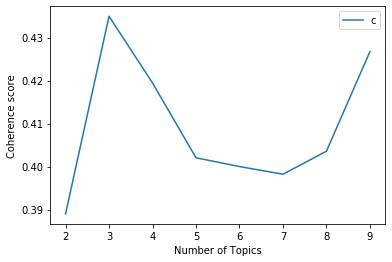

In [71]:
start,stop,step=2,10,1

hbo_reviews_list,usernames=load_data_from_dict(hbomax_clean)
clean_reviews_list=preprocess_data(hbo_reviews_list)
term_dictionary, doc_term_matrix = prepare_corpus(clean_reviews_list)
hbomax_coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_reviews_list, start, stop, step)
plot_graph(hbomax_coherence_values,start,stop,step)

In [72]:
hbomax_number_of_topics = start + step * hbomax_coherence_values.index(max(hbomax_coherence_values))
print("hbomax best number of topics = ", hbomax_number_of_topics)
print()
words=8
model=create_gensim_lsa_model(clean_reviews_list,hbomax_number_of_topics,words)
# print(model.print_topics(num_topics=hbomax_number_of_topics, num_words=words))

hbomax best number of topics =  3



In [73]:
get_lsa_topics(model, hbomax_number_of_topics)

,Topic # 01,Topic # 02,Topic # 03
0,app,hbo,app
1,hbo,app,watch
2,watch,max,show
3,show,download,episod
4,tv,episod,movi
5,max,play,go
6,download,show,like
7,content,watch,work


In [74]:
#hulu best number of topics 

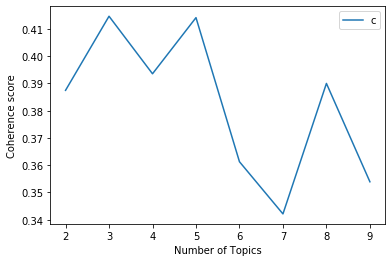

In [75]:
start,stop,step=2,10,1

hulu_reviews_list,usernames=load_data_from_dict(hulu_clean)
clean_reviews_list=preprocess_data(hulu_reviews_list)
term_dictionary, doc_term_matrix = prepare_corpus(clean_reviews_list)
hulu_coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_reviews_list, start, stop, step)
plot_graph(hulu_coherence_values,start,stop,step)

In [76]:
hulu_number_of_topics = start + step * hulu_coherence_values.index(max(hulu_coherence_values)) 
print("hulu best number of topics = ", hulu_number_of_topics)
print()
words=8
model=create_gensim_lsa_model(clean_reviews_list,hulu_number_of_topics,words)
# print(model.print_topics(num_topics=hulu_number_of_topics, num_words=words))

hulu best number of topics =  3



In [77]:
get_lsa_topics(model, hulu_number_of_topics)

,Topic # 01,Topic # 02,Topic # 03
0,show,app,ad
1,watch,show,episod
2,app,watch,minut
3,episod,episod,second
4,ad,ad,show
5,time,work,next
6,get,use,new
7,im,updat,5


In [78]:
#netflix best number of topics

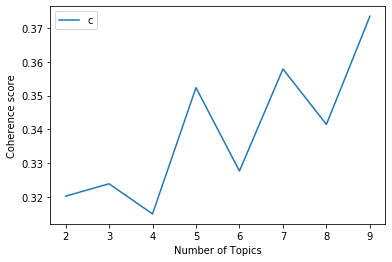

In [79]:
start,stop,step=2,10,1

netflix_reviews_list,usernames=load_data_from_dict(netflix_clean)
clean_reviews_list=preprocess_data(netflix_reviews_list)
term_dictionary, doc_term_matrix = prepare_corpus(clean_reviews_list)
netflix_coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_reviews_list, start, stop, step)
plot_graph(netflix_coherence_values,start,stop,step)

In [80]:
netflix_number_of_topics = start + step * netflix_coherence_values.index(max(netflix_coherence_values))
print("netflix best number of topics = ", netflix_number_of_topics)
print()
words=8
model=create_gensim_lsa_model(clean_reviews_list,netflix_number_of_topics,words)
# print(model.print_topics(num_topics=netflix_number_of_topics, num_words=words))

netflix best number of topics =  9



In [81]:
get_lsa_topics(model, netflix_number_of_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09
0,show,movi,show,netflix,watch,watch,season,pleas,download
1,netflix,show,netflix,app,app,season,like,love,love
2,watch,season,app,watch,show,like,movi,like,app
3,movi,app,use,season,season,netflix,kid,season,kid
4,like,pleas,like,download,netflix,app,would,back,episod
5,app,episod,updat,love,pleas,pleas,love,would,section
6,love,good,tri,list,like,show,section,netflix,pleas
7,would,netflix,work,updat,anim,would,thing,make,time


In [82]:
#disneyplus best number of topics

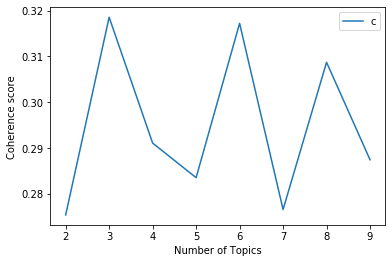

In [83]:
start,stop,step=2,10,1

disneyplus_reviews_list,usernames=load_data_from_dict(disneyplus_clean)
clean_reviews_list=preprocess_data(disneyplus_reviews_list)
term_dictionary, doc_term_matrix = prepare_corpus(clean_reviews_list)
disneyplus_coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_reviews_list, start, stop, step)
plot_graph(disneyplus_coherence_values,start,stop,step)

In [84]:
disneyplus_number_of_topics = start + step * disneyplus_coherence_values.index(max(disneyplus_coherence_values)) 
print("disneyplus best number of topics = ", disneyplus_number_of_topics)
print()
words=8
model=create_gensim_lsa_model(clean_reviews_list,disneyplus_number_of_topics,words)
# print(model.print_topics(num_topics=disneyplus_number_of_topics, num_words=words))

disneyplus best number of topics =  3



In [85]:
get_lsa_topics(model, disneyplus_number_of_topics)

,Topic # 01,Topic # 02,Topic # 03
0,watch,disney,app
1,disney,watch,show
2,app,episod,movi
3,movi,movi,watch
4,show,continu,disney
5,like,plu,use
6,love,left,content
7,episod,list,issu


In [86]:
#peacock best number of topics

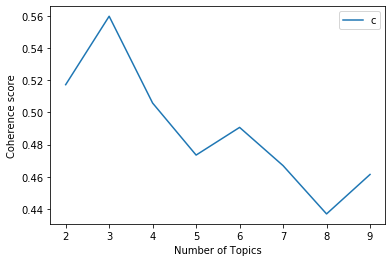

In [87]:
start,stop,step=2,10,1

peacock_reviews_list,usernames=load_data_from_dict(peacock_clean)
clean_reviews_list=preprocess_data(peacock_reviews_list)
term_dictionary, doc_term_matrix = prepare_corpus(clean_reviews_list)
peacock_coherence_values = compute_coherence_values(term_dictionary, doc_term_matrix,clean_reviews_list, start, stop, step)
plot_graph(peacock_coherence_values,start,stop,step)

In [88]:
peacock_number_of_topics = start + step * peacock_coherence_values.index(max(peacock_coherence_values))
print("peacock best number of topics = ", peacock_number_of_topics)
print()
words=8
model=create_gensim_lsa_model(clean_reviews_list,peacock_number_of_topics,words)
# print(model.print_topics(num_topics=peacock_number_of_topics, num_words=words))

peacock best number of topics =  3



In [89]:
get_lsa_topics(model, peacock_number_of_topics)

,Topic # 01,Topic # 02,Topic # 03
0,app,game,show
1,watch,watch,app
2,tv,app,episod
3,show,tv,game
4,stream,leagu,watch
5,peacock,premier,nbc
6,game,pay,commerci
7,use,nbc,premier


##### 03 Part of Speech Tagging 

In [90]:
stop_words = set(stopwords.words('english')) 

In [91]:
hbomax_pos = []
for key in hbomax_dict.keys():
    txt = hbomax_dict[key][0]
    tokenized = sent_tokenize(txt) 
    taggedList = []
    
    for i in tokenized:    
        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 

        # removing stop words from wordList 
        wordsList = [w for w in wordsList if not w in stop_words]  

        #  Using a Tagger. Which is part-of-speech  
        # tagger or POS-tagger.  
        tagged = nltk.pos_tag(wordsList)
        
        taggedList.extend(tagged)
    
    hbomax_pos.append(taggedList)

In [92]:
hulu_pos = []
for key in hulu_dict.keys():
    txt = hulu_dict[key][0]
    tokenized = sent_tokenize(txt) 
    taggedList = []
    
    for i in tokenized:    
        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 

        # removing stop words from wordList 
        wordsList = [w for w in wordsList if not w in stop_words]  

        #  Using a Tagger. Which is part-of-speech  
        # tagger or POS-tagger.  
        tagged = nltk.pos_tag(wordsList)
        
        taggedList.extend(tagged)
    
    hulu_pos.append(taggedList)

In [93]:
netflix_pos = []
for key in netflix_dict.keys():
    txt = netflix_dict[key][0]
    tokenized = sent_tokenize(txt) 
    taggedList = []
    
    for i in tokenized:    
        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 

        # removing stop words from wordList 
        wordsList = [w for w in wordsList if not w in stop_words]  

        #  Using a Tagger. Which is part-of-speech  
        # tagger or POS-tagger.  
        tagged = nltk.pos_tag(wordsList)
        
        taggedList.extend(tagged)
    
    netflix_pos.append(taggedList)

In [94]:
disneyplus_pos = []
for key in disneyplus_dict.keys():
    txt = disneyplus_dict[key][0]
    tokenized = sent_tokenize(txt) 
    taggedList = []
    
    for i in tokenized:    
        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 

        # removing stop words from wordList 
        wordsList = [w for w in wordsList if not w in stop_words]  

        #  Using a Tagger. Which is part-of-speech  
        # tagger or POS-tagger.  
        tagged = nltk.pos_tag(wordsList)
        
        taggedList.extend(tagged)
    
    disneyplus_pos.append(taggedList)

In [95]:
peacock_pos = []
for key in peacock_dict.keys():
    txt = peacock_dict[key][0]
    tokenized = sent_tokenize(txt) 
    taggedList = []
    
    for i in tokenized:    
        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 

        # removing stop words from wordList 
        wordsList = [w for w in wordsList if not w in stop_words]  

        #  Using a Tagger. Which is part-of-speech  
        # tagger or POS-tagger.  
        tagged = nltk.pos_tag(wordsList)
        
        taggedList.extend(tagged)
    
    peacock_pos.append(taggedList)

In [97]:
print(hbomax_pos[0])

[('Sorry', 'NNP'), ('HBO', 'NNP'), ('I', 'PRP'), ('really', 'RB'), ('love', 'VB'), ('shows', 'NNS'), (',', ','), ('things', 'NNS'), ('I', 'PRP'), ('issues', 'NNS'), ('App', 'NNP'), ('Xbox', 'NNP'), ('One', 'NNP'), ('version', 'NN'), ('app', 'NN'), ('(', '('), ('seems', 'VBZ'), ('like', 'IN'), ('others', 'NNS'), ('problem', 'NN'), (',', ','), ('like', 'IN'), ('Ps4', 'NNP'), (')', ')'), ('My', 'PRP$'), ('List-', 'JJ'), ('always', 'RB'), ('great', 'JJ'), ('function', 'NN'), ('streaming', 'VBG'), ('service', 'NN'), ('.', '.'), ('When', 'WRB'), ('’', 'NN'), ('accessible', 'JJ'), ('...', ':'), ('My', 'PRP$'), ('List', 'NNP'), ('always', 'RB'), ('appear', 'VBP'), ('HBO', 'NNP'), ('Max', 'NNP'), ('.', '.'), ('Additionally', 'RB'), ('’', 'JJ'), ('list', 'NN'), ('things', 'NNS'), ('’', 'NNP'), ('added', 'VBD'), ('.', '.'), ('This', 'DT'), ('frustrating', 'JJ'), ('people', 'NNS'), ('trying', 'VBG'), ('watch', 'NN'), ('something', 'NN'), ('added', 'VBD'), (',', ','), ('search', 'NN'), ('.', '.'), 

In [99]:
print(hulu_pos[0])

[('Omg', 'NNP'), (',', ','), ('political', 'JJ'), ('ads', 'NNS'), ('!', '.'), ('I', 'PRP'), ('brand-new', 'VBP'), ('customer', 'NN'), ('.', '.'), ('I', 'PRP'), ('took', 'VBD'), ('advantage', 'RB'), ('$', '$'), ('0.99', 'CD'), ('offer', 'NN'), ('year', 'NN'), ('.', '.'), ('So', 'RB'), ('far', 'RB'), ('I', 'PRP'), ('quite', 'VBP'), ('happy', 'JJ'), ('service', 'NN'), ('except', 'IN'), ('one', 'CD'), ('thing', 'NN'), ('.', '.'), ('I', 'PRP'), ('’', 'VBP'), ('problem', 'NN'), ('commercials', 'NNS'), ('since', 'IN'), ('I', 'PRP'), ('knew', 'VBD'), ('would', 'MD'), ('happen', 'VB'), ('due', 'JJ'), ('offer', 'NN'), ('price', 'NN'), ('.', '.'), ('What', 'WP'), ('I', 'PRP'), ('’', 'VBP'), ('like', 'IN'), ('commercials', 'NNS'), ('.', '.'), ('It', 'PRP'), ('seems', 'VBZ'), ('like', 'IN'), ('watching', 'VBG'), ('program', 'NN'), ('several', 'JJ'), ('episodes', 'NNS'), (',', ','), ('repetition', 'NN'), ('ads', 'NNS'), (',', ','), ('quite', 'RB'), ('honestly', 'RB'), (',', ','), ('going', 'VBG'), (

In [100]:
print(netflix_pos[0])

[('Let', 'VB'), ('start', 'VB'), ('saying', 'VBG'), ('amazing', 'JJ'), ('movie', 'NN'), ('app', 'NN'), ('get', 'NN'), ('.', '.'), ('But', 'CC'), ('people', 'NNS'), ('aware', 'JJ'), ('people', 'NNS'), ('using', 'VBG'), ('Netflix', 'NNP'), ('?', '.'), ('There', 'EX'), ('toddlers', 'NNS'), (',', ','), ('preteens', 'NNS'), (',', ','), ('teens', 'NNS'), (',', ','), ('young', 'JJ'), ('adults', 'NNS'), (',', ','), ('adults', 'NNS'), (',', ','), ('whatever', 'WDT'), ('call', 'VBP'), ('people', 'NNS'), ('little', 'JJ'), ('old', 'JJ'), ('kids', 'NNS'), (',', ','), ('elderly', 'JJ'), ('people', 'NNS'), (',', ','), ('elderly', 'JJ'), ('people', 'NNS'), ('.', '.'), ('We', 'PRP'), ('need', 'VBP'), ('sections', 'NNS'), ('!', '.'), ('!', '.'), ('!', '.'), ('Toddlers', 'NNS'), ('kids', 'NNS'), ('grouped', 'VBD'), ('together', 'RB'), (',', ','), ('preteens', 'NNS'), ('teens', 'NNS'), ('need', 'VBP'), ('section', 'NN'), (',', ','), ('.', '.'), ('No', 'DT'), ('kiddy', 'NN'), ('shows', 'VBZ'), ('maybe', 'R

In [101]:
print(disneyplus_pos[0])

[('My', 'PRP$'), ('entire', 'JJ'), ('family', 'NN'), ('enjoying', 'VBG'), ('variety', 'NN'), ('great', 'JJ'), ('content', 'NN'), ('.', '.'), ('The', 'DT'), ('service', 'NN'), ('also', 'RB'), ('steady', 'JJ'), ('reliable', 'JJ'), ('us', 'PRP'), (',', ','), ('one', 'CD'), ('two', 'CD'), ('glitches', 'NNS'), ('months', 'NNS'), ('.', '.'), ('However', 'RB'), (',', ','), ('app/', 'RB'), ('Apple', 'NNP'), ('TV', 'NNP'), ('interface', 'NN'), ('could', 'MD'), ('use', 'VB'), ('improvement', 'NN'), ('...', ':'), ('My', 'NNP'), ('kids', 'NNS'), ('young', 'JJ'), ('enough', 'RB'), ('I', 'PRP'), ("n't", 'RB'), ('really', 'RB'), ('want', 'VB'), ('complete', 'JJ'), ('access', 'NN'), ('.', '.'), ('Its', 'PRP$'), ('great', 'JJ'), ('profiles', 'NNS'), ('limits', 'NNS'), (',', ','), ('exists', 'VBZ'), ('I', 'PRP'), ("'ve", 'VBP'), ('yet', 'RB'), ('find', 'VB'), ('way', 'NN'), ('prevent', 'NN'), ('using', 'VBG'), ('profile', 'NN'), ('.', '.'), ('(', '('), ('We', 'PRP'), ('mostly', 'RB'), ('steam', 'VBP'), 

In [102]:
print(peacock_pos[0])

[('I', 'PRP'), ('day', 'NN'), ('1', 'CD'), ('user', 'NN'), (',', ','), ('waited', 'VBD'), ('months', 'NNS'), ('app', 'IN'), ('first', 'JJ'), ('never', 'RB'), ('issues', 'NNS'), ('Apple', 'NNP'), ('TV', 'NNP'), ('iPhone', 'NN'), ('’', 'NN'), ('constant', 'JJ'), ('errors', 'NNS'), ('.', '.'), ('Most', 'JJS'), ('recent', 'JJ'), ('solid', 'JJ'), ('black', 'JJ'), ('screen', 'NN'), ('outline', 'JJ'), ('channel', 'NN'), ('schedule', 'NN'), ('instead', 'RB'), ('puss', 'JJ'), ('boots', 'NNS'), ('error', 'VBP'), ('screen', 'JJ'), ('occasionally', 'RB'), ('.', '.'), ('They', 'PRP'), ('also', 'RB'), ('took', 'VBD'), ('away', 'RP'), ('office', 'NN'), ('channel', 'NN'), ('quietly', 'RB'), ('couple', 'JJ'), ('days', 'NNS'), ('ago', 'RB'), ('.', '.'), ('Changed', 'VBN'), ('reality', 'NN'), ('tv', 'NN'), ('“', 'NNP'), ('win', 'VBZ'), ('”', 'JJ'), ('channel', 'NN'), ('(', '('), ('huge', 'JJ'), ('variety', 'NN'), ('programming', 'VBG'), (')', ')'), ('deal', 'NN'), ('deal', 'NN'), ('week', 'NN'), ('non', 